In [1]:
import pandas as pd
import requests
import datetime
import yfinance as yahooFinance

In [987]:
ticket_name = 'AAPL'

In [988]:
data = yahooFinance.Ticker(ticket_name)


In [989]:
data

yfinance.Ticker object <AAPL>

In [990]:
df = data.history(period="10y")

In [991]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-09-30 00:00:00-04:00,14.875732,15.013190,14.787210,14.860147,260156400,0.0,0.0
2013-10-01 00:00:00-04:00,14.913130,15.246334,14.910947,15.209554,353883600,0.0,0.0
2013-10-02 00:00:00-04:00,15.136935,15.329251,15.078336,15.259431,289184000,0.0,0.0
2013-10-03 00:00:00-04:00,15.289042,15.346395,14.984516,15.067738,322753200,0.0,0.0
2013-10-04 00:00:00-04:00,15.081758,15.104824,14.917806,15.055888,258868400,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-22 00:00:00-04:00,174.669998,177.080002,174.050003,174.789993,56663000,0.0,0.0
2023-09-25 00:00:00-04:00,174.199997,176.970001,174.149994,176.080002,46172700,0.0,0.0
2023-09-26 00:00:00-04:00,174.820007,175.199997,171.660004,171.960007,64588900,0.0,0.0


In [992]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-09-30 00:00:00-04:00 to 2023-09-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   float64
 6   Stock Splits  2517 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.3 KB


In [993]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000
mean,71.736221,72.531524,70.983591,71.788605,1.433633e+08,0.002784,0.004370
std,54.707191,55.357123,54.094556,54.748054,8.877306e+07,0.022533,0.160672
min,14.875732,15.013190,14.787210,14.860147,3.145820e+07,0.000000,0.000000
25%,26.455118,26.703626,26.237337,26.436670,8.426790e+07,0.000000,0.000000
50%,44.453773,44.809863,44.121938,44.452934,1.160284e+08,0.000000,0.000000
75%,127.068652,128.896168,125.428771,127.331703,1.771584e+08,0.000000,0.000000
max,195.975362,197.962667,195.016650,196.185074,1.065523e+09,0.240000,7.000000


In [994]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-09-30 00:00:00-04:00,14.875732,15.013190,14.787210,14.860147,260156400,0.0,0.0
2013-10-01 00:00:00-04:00,14.913130,15.246334,14.910947,15.209554,353883600,0.0,0.0
2013-10-02 00:00:00-04:00,15.136935,15.329251,15.078336,15.259431,289184000,0.0,0.0
2013-10-03 00:00:00-04:00,15.289042,15.346395,14.984516,15.067738,322753200,0.0,0.0
2013-10-04 00:00:00-04:00,15.081758,15.104824,14.917806,15.055888,258868400,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-22 00:00:00-04:00,174.669998,177.080002,174.050003,174.789993,56663000,0.0,0.0
2023-09-25 00:00:00-04:00,174.199997,176.970001,174.149994,176.080002,46172700,0.0,0.0
2023-09-26 00:00:00-04:00,174.820007,175.199997,171.660004,171.960007,64588900,0.0,0.0


In [995]:
df = df[['Close']]

In [996]:
df.reset_index(inplace=True)

In [997]:
df

,Date,Close
0,2013-09-30 00:00:00-04:00,14.860147
1,2013-10-01 00:00:00-04:00,15.209554
2,2013-10-02 00:00:00-04:00,15.259431
3,2013-10-03 00:00:00-04:00,15.067738
4,2013-10-04 00:00:00-04:00,15.055888
...,...,...
2512,2023-09-22 00:00:00-04:00,174.789993
2513,2023-09-25 00:00:00-04:00,176.080002
2514,2023-09-26 00:00:00-04:00,171.960007
2515,2023-09-27 00:00:00-04:00,170.429993


In [998]:
import torch

In [999]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [1000]:
import matplotlib.pyplot as plt

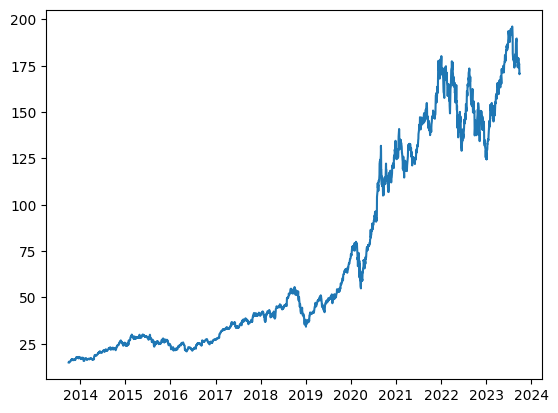

In [1001]:
plt.plot(df['Date'],df['Close'])

In [1002]:
def prepare_dataframe(df,n_steps):
    dc = df.copy()

    dc.set_index('Date',inplace=True)

    for i in range(1,n_steps+1):
        dc[f'Close(t-{i})'] = dc['Close'].shift(i)
    
    dc.dropna(inplace=True)

    return dc


In [1404]:
lookback = 10
shifted_df = prepare_dataframe(df,lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10)
Date,,,,,,,,,,,
2013-10-14 00:00:00-04:00,15.461408,15.360730,15.261918,15.166851,14.990741,15.203013,15.055888,15.067738,15.259431,15.209554,14.860147
2013-10-15 00:00:00-04:00,15.543694,15.461408,15.360730,15.261918,15.166851,14.990741,15.203013,15.055888,15.067738,15.259431,15.209554
2013-10-16 00:00:00-04:00,15.619435,15.543694,15.461408,15.360730,15.261918,15.166851,14.990741,15.203013,15.055888,15.067738,15.259431
2013-10-17 00:00:00-04:00,15.725100,15.619435,15.543694,15.461408,15.360730,15.261918,15.166851,14.990741,15.203013,15.055888,15.067738
2013-10-18 00:00:00-04:00,15.861940,15.725100,15.619435,15.543694,15.461408,15.360730,15.261918,15.166851,14.990741,15.203013,15.055888
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-22 00:00:00-04:00,174.789993,173.929993,175.490005,179.070007,177.970001,175.009995,175.740005,174.210007,176.300003,179.360001,178.179993
2023-09-25 00:00:00-04:00,176.080002,174.789993,173.929993,175.490005,179.070007,177.970001,175.009995,175.740005,174.210007,176.300003,179.360001
2023-09-26 00:00:00-04:00,171.960007,176.080002,174.789993,173.929993,175.490005,179.070007,177.970001,175.009995,175.740005,174.210007,176.300003


In [1405]:
df.tail()

,Date,Close
2512,2023-09-22 00:00:00-04:00,174.789993
2513,2023-09-25 00:00:00-04:00,176.080002
2514,2023-09-26 00:00:00-04:00,171.960007
2515,2023-09-27 00:00:00-04:00,170.429993
2516,2023-09-28 00:00:00-04:00,170.690002


In [1406]:
#Mali4521

In [1407]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim


In [1408]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [1409]:
columns = shifted_df.columns.to_list()
columns

['Close',
 'Close(t-1)',
 'Close(t-2)',
 'Close(t-3)',
 'Close(t-4)',
 'Close(t-5)',
 'Close(t-6)',
 'Close(t-7)',
 'Close(t-8)',
 'Close(t-9)',
 'Close(t-10)']

In [1410]:
shifted_df[columns] = scaler.fit_transform(shifted_df)

In [1411]:
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10)
Date,,,,,,,,,,,
2013-10-14 00:00:00-04:00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.997657,-0.999281,-0.999150,-0.997034,-0.997585,-1.000000
2013-10-15 00:00:00-04:00,-0.999089,-0.998886,-0.998908,-0.998950,-0.998056,-1.000000,-0.997657,-0.999281,-0.999150,-0.997034,-0.996146
2013-10-16 00:00:00-04:00,-0.998251,-0.997976,-0.997795,-0.997858,-0.997007,-0.998056,-1.000000,-0.997657,-0.999281,-0.999150,-0.995596
2013-10-17 00:00:00-04:00,-0.997082,-0.997139,-0.996885,-0.996746,-0.995916,-0.997007,-0.998056,-1.000000,-0.997657,-0.999281,-0.997710
2013-10-18 00:00:00-04:00,-0.995567,-0.995970,-0.996048,-0.995836,-0.994805,-0.995916,-0.997007,-0.998056,-1.000000,-0.997657,-0.997841
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-22 00:00:00-04:00,0.763229,0.753849,0.771228,0.810902,0.798944,0.766272,0.774330,0.757442,0.780511,0.814287,0.801405
2023-09-25 00:00:00-04:00,0.777505,0.763361,0.753983,0.771348,0.811086,0.798944,0.766272,0.774330,0.757442,0.780511,0.814421
2023-09-26 00:00:00-04:00,0.731910,0.777629,0.763490,0.754112,0.771570,0.811086,0.798944,0.766272,0.774330,0.757442,0.780669


In [1412]:
print(shifted_df.corr())

                Close  Close(t-1)  Close(t-2)  Close(t-3)  Close(t-4)  \
Close        1.000000    0.999524    0.999083    0.998671    0.998280   
Close(t-1)   0.999524    1.000000    0.999523    0.999083    0.998672   
Close(t-2)   0.999083    0.999523    1.000000    0.999523    0.999084   
Close(t-3)   0.998671    0.999083    0.999523    1.000000    0.999524   
Close(t-4)   0.998280    0.998672    0.999084    0.999524    1.000000   
Close(t-5)   0.997895    0.998280    0.998672    0.999084    0.999523   
Close(t-6)   0.997472    0.997894    0.998279    0.998671    0.999083   
Close(t-7)   0.997072    0.997472    0.997894    0.998278    0.998670   
Close(t-8)   0.996640    0.997074    0.997475    0.997896    0.998277   
Close(t-9)   0.996264    0.996641    0.997076    0.997476    0.997894   
Close(t-10)  0.995830    0.996263    0.996640    0.997074    0.997473   

             Close(t-5)  Close(t-6)  Close(t-7)  Close(t-8)  Close(t-9)  \
Close          0.997895    0.997472    0.997072 

In [1413]:
data, test_data = train_test_split(shifted_df, test_size=0.10)
train_data, valid_data = train_test_split(data,test_size=0.10)

In [1414]:
index = int(len(shifted_df)*0.9)
index

2256

In [1415]:
train_data = shifted_df[:index]
test_data = shifted_df[index:]

In [1416]:
class CreateDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
         
    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        features = torch.tensor(row.iloc[1:])
        label = torch.tensor(row.iloc[0])
        return features.reshape(-1,1).float(),label.view(1).float()
    
    def __len__(self):
        return len(self.dataframe)

In [1417]:
valid_data.head(1)

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10)
Date,,,,,,,,,,,
2019-12-30 00:00:00-05:00,-0.384318,-0.388187,-0.387132,-0.401601,-0.400965,-0.41324,-0.411679,-0.412433,-0.410629,-0.41211,-0.423762


In [1418]:
train_dataset = CreateDataset(dataframe=train_data)
train_loader = DataLoader(train_dataset, shuffle=True,batch_size = 8)

In [1419]:
valid_dataset = CreateDataset(dataframe=valid_data)
valid_loader = DataLoader(valid_dataset, shuffle=True,batch_size = 8)

In [1420]:
test_dataset = CreateDataset(dataframe=test_data)
test_loader = DataLoader(test_dataset, shuffle=True,batch_size = 8)

In [1421]:
example = iter(train_loader)
feature, label = next(example)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17176\341124280.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(row.iloc[1:])


In [1422]:
feature.size(), label.size()

(torch.Size([8, 10, 1]), torch.Size([8, 1]))

In [1423]:
device

'cpu'

In [1424]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [1425]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers,dropout, bidirectional):
        super().__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional

        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()

        self.lstm1 = nn.LSTM(hidden_size, hidden_size, num_layers,batch_first=True, dropout=dropout,bidirectional=bidirectional)
        
        if bidirectional: #2 more layers
            self.lstm2 = nn.LSTM(hidden_size*2, hidden_size, num_layers,batch_first=True, dropout=dropout,bidirectional=bidirectional)
            self.layer2 = nn.Linear(hidden_size*2, 128)
        else:
            self.lstm2 = nn.LSTM(hidden_size*2, hidden_size, num_layers,batch_first=True, dropout=dropout,bidirectional=bidirectional)
            self.layer2 = nn.Linear(hidden_size, 128)
        



    def forward(self, x):
       batch_size = x.size(0)
       if self.bidirectional:
           h0 = torch.zeros(self.num_layers*2, batch_size, self.hidden_size).to(self.device)
           c0 = torch.zeros(self.num_layers*2, batch_size, self.hidden_size).to(self.device)

           h1 = torch.zeros(self.num_layers*2, batch_size, self.hidden_size).to(self.device)
           c1 = torch.zeros(self.num_layers*2, batch_size, self.hidden_size).to(self.device)
       else:
           h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)
           c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)

           h1 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)
           c1 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)
           
       x = self.linear1(x)
       x = self.relu(x)
       
       
       h0, c0 = self.lstm1(x, (h0, c0))

       h1, c1 = self.lstm2(h0, (h1, c1))

       out = self.out_layer(h1[:, -1, :])
       out = self.relu1()
       return out

In [1426]:
rnn = LSTM(input_size=1,hidden_size=8,num_layers=2,dropout=0.2,bidirectional=True)
rnn.to(device=device)
rnn

LSTM(
  (linear): Linear(in_features=1, out_features=8, bias=True)
  (relu): ReLU()
  (lstm1): LSTM(8, 8, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (lstm2): LSTM(16, 8, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

In [1427]:
def train_one_epoch():
    rnn.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
       
       
        output = rnn(x_batch)
        
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.5f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [1428]:
def validate_one_epoch():
    rnn.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = rnn(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.5f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [1429]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    # validate_one_epoch()

Epoch: 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_17176\341124280.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(row.iloc[1:])


Batch 100, Loss: 0.30834
Batch 200, Loss: 0.07477

Epoch: 2
Batch 100, Loss: 0.00658
Batch 200, Loss: 0.00585

Epoch: 3
Batch 100, Loss: 0.00419
Batch 200, Loss: 0.00398

Epoch: 4
Batch 100, Loss: 0.00345
Batch 200, Loss: 0.00297

Epoch: 5
Batch 100, Loss: 0.00296
Batch 200, Loss: 0.00245

Epoch: 6
Batch 100, Loss: 0.00226
Batch 200, Loss: 0.00226

Epoch: 7
Batch 100, Loss: 0.00228
Batch 200, Loss: 0.00209

Epoch: 8
Batch 100, Loss: 0.00211
Batch 200, Loss: 0.00221

Epoch: 9
Batch 100, Loss: 0.00195
Batch 200, Loss: 0.00188

Epoch: 10
Batch 100, Loss: 0.00164
Batch 200, Loss: 0.00197



In [1462]:
# torch.save(rnn.to(torch.device('cpu')).state_dict(), './rnn_AMZN.pth')

In [1463]:
shifted_df.tail(1)

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10)
Date,,,,,,,,,,,
2023-09-28 00:00:00-04:00,0.717856,0.715137,0.732206,0.777867,0.763844,0.754351,0.77157,0.811086,0.798944,0.766272,0.774492


In [1464]:
x_train = test_data.drop(columns=['Close']).to_numpy()
x_train = torch.from_numpy(x_train).reshape((-1,lookback,1)).float()

y_train = test_data['Close'].to_numpy()
y_train = torch.from_numpy(y_train).reshape((-1,1)).float()


In [1465]:
x_train.size()


torch.Size([251, 10, 1])

In [1466]:
# x_train = shifted_df.tail(20).drop(columns=['Close']).to_numpy()
# x_train = torch.from_numpy(x_train).reshape((-1,lookback,1)).float()

# y_train = shifted_df.tail(20)['Close'].to_numpy()
# y_train = torch.from_numpy(y_train).reshape((-1,1)).float()

In [1467]:
with torch.no_grad():
    predicted = rnn(x_train.to(device)).to('cpu').numpy()

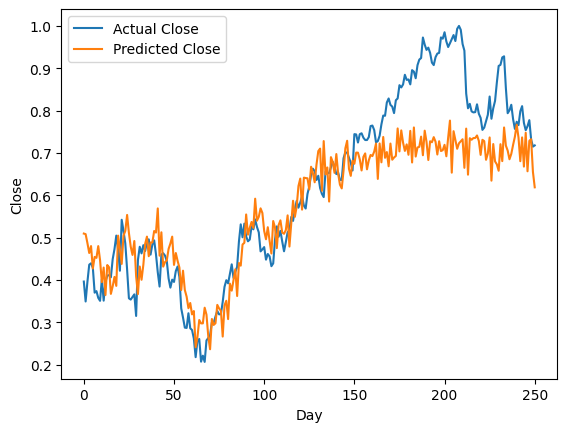

In [1468]:
plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [1453]:
import numpy as np

In [1454]:
from copy import deepcopy as dc

In [1455]:
train_predictions = predicted.flatten()

dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions[-1]

172.08254877417815

In [1456]:
dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([187.86999637, 189.46000915, 189.69999787, 182.91000512,
       177.55999853, 178.17999003, 179.36000009, 176.30000121,
       174.21000745, 175.7400042 , 175.00999318, 177.97000125,
       179.07000789, 175.49000293, 173.92999009, 174.78999185,
       176.07999988, 171.96000684, 170.42999394, 170.69000236])

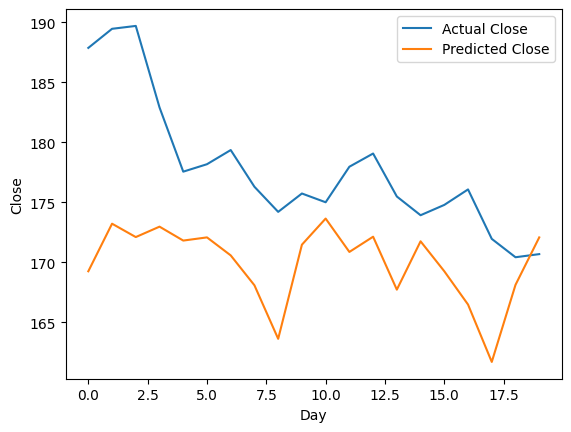

In [1457]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [1458]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [1459]:
r2 = r2_score(new_y_train, train_predictions)
r2

-1.899680906696898

In [1460]:
rmse = np.sqrt(mean_squared_error(new_y_train, train_predictions))
rmse

9.387348057389765

In [1461]:
adj_r2 = 1 - (1-r2)*((train_predictions.size-1)/(train_predictions.size-10-1))
adj_r2

-5.121548580804562

In [1449]:
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10)
Date,,,,,,,,,,,
2013-10-14 00:00:00-04:00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.997657,-0.999281,-0.999150,-0.997034,-0.997585,-1.000000
2013-10-15 00:00:00-04:00,-0.999089,-0.998886,-0.998908,-0.998950,-0.998056,-1.000000,-0.997657,-0.999281,-0.999150,-0.997034,-0.996146
2013-10-16 00:00:00-04:00,-0.998251,-0.997976,-0.997795,-0.997858,-0.997007,-0.998056,-1.000000,-0.997657,-0.999281,-0.999150,-0.995596
2013-10-17 00:00:00-04:00,-0.997082,-0.997139,-0.996885,-0.996746,-0.995916,-0.997007,-0.998056,-1.000000,-0.997657,-0.999281,-0.997710
2013-10-18 00:00:00-04:00,-0.995567,-0.995970,-0.996048,-0.995836,-0.994805,-0.995916,-0.997007,-0.998056,-1.000000,-0.997657,-0.997841
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-22 00:00:00-04:00,0.763229,0.753849,0.771228,0.810902,0.798944,0.766272,0.774330,0.757442,0.780511,0.814287,0.801405
2023-09-25 00:00:00-04:00,0.777505,0.763361,0.753983,0.771348,0.811086,0.798944,0.766272,0.774330,0.757442,0.780511,0.814421
2023-09-26 00:00:00-04:00,0.731910,0.777629,0.763490,0.754112,0.771570,0.811086,0.798944,0.766272,0.774330,0.757442,0.780669


In [745]:
train_dataset = CreateDataset(dataframe=shifted_df.tail(500))
train_loader = DataLoader(train_dataset, shuffle=False,batch_size = 2)

In [746]:
print(f'Epoch: {epoch + 1}')
running_loss = 0.0
    
for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
       
       
        output = rnn(x_batch)
        
        loss = torch.sqrt(loss_function(output, y_batch))
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.5f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0

Epoch: 10


C:\Users\Admin\AppData\Local\Temp\ipykernel_19124\341124280.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(row.iloc[1:])


Batch 100, Loss: 0.03140
Batch 200, Loss: 0.03188


In [1024]:
import datetime

In [1037]:
for i in range(11):
    print((datetime.datetime.now() - datetime.timedelta(days=10-i)).strftime('%d-%m-%Y'))


18-09-2023
19-09-2023
20-09-2023
21-09-2023
22-09-2023
23-09-2023
24-09-2023
25-09-2023
26-09-2023
27-09-2023
28-09-2023


In [1066]:
today = datetime.datetime.now()
businessDays = pd.date_range(end=today, periods=14, freq='D')
df = pd.DataFrame({'Date' : businessDays[:11]})
df.Date.dt.strftime('%d-%m-%Y').to_list()

['15-09-2023',
 '16-09-2023',
 '17-09-2023',
 '18-09-2023',
 '19-09-2023',
 '20-09-2023',
 '21-09-2023',
 '22-09-2023',
 '23-09-2023',
 '24-09-2023',
 '25-09-2023']

In [1070]:
df[-2:-1]

,Date
9,2023-09-24 11:33:48.530765


In [419]:
x = torch.rand(3,2,dtype=torch.float)
x

tensor([[0.1130, 0.5595],
        [0.0722, 0.8199],
        [0.6894, 0.1708]])